Data Dictionary 

Variable Definition Key

<br>>survival: Survival 0 = No, 1 = Yes

<br>>pclass:  Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

<br>>sex:  Sex

<br>>Age:  Age in years

<br>>sibsp:  # of siblings / spouses aboard the Titanic

<br>>parch:  # of parents / children aboard the Titanic

<br>>ticket :Ticket number

<br>>fare:  Passenger fare

<br>>cabin:  Cabin number

<br>>embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

#For plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Json
import os
import json
import random
import requests

#MAP
from ipyleaflet import Map, basemaps, Marker, AntPath, AwesomeIcon, basemap_to_tiles, GeoJSON, LayersControl, DivIcon, TileLayer, SplitMapControl, FullScreenControl

In [38]:
train_df = pd.read_csv('/Users/vipulpayal/Desktop/Day/#D-1-21.11.2022/Titanic.csv')
traincopy_df = train_df.copy()
print(train_df.shape)
train_df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b><h1>Missing Value Analysis</h1></b>

In [39]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4><b>Solution:</b><p>
        <p>In case of Age Column, data can be missing beacuse of human error. This shows that the efficiency of the staff of the ship is not good in the case            of recording data.
        <p>In case of Cabin Column, missing data again reflects poor efficiency of staff. This also shows that the cabin number of the passengers is of least            importance for the company owing the ship.</h4>

<b><h1>Dealing with Missing values</h1></b>

In [40]:
traincopy_df = traincopy_df.drop(['Name','Cabin', 'Ticket'], axis=1)

In [41]:
traincopy_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


<h4><b>Solution:</b></h4><p>From the data frame, we removed "Name", "Cabin" and "Ticket" Columns.<br>>"Cabin" column already contains 687 missing values. This means only 204 values are known. As Known values are very less than Missing values, no effect will occur on our observation<br>>"Ticket" column was removed as knowledge of ticket would have no effect in our study of data.<br>>"Name" column was removed as knowledge of Name would have no effect in our study of data.

<b><h1>Filling in missing values</h1></b>

In [42]:
traincopy_df = traincopy_df.interpolate()

In [43]:
traincopy_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [44]:
traincopy_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

<b><h1>Analysis</h1></b>

In [45]:
#Found 0.42 as minimum age, which is not possible. Therefore rounded off the entire column
traincopy_df['Age'] = round(traincopy_df['Age'])

In [46]:
#Converting dataType from Float to Int
traincopy_df['Age'] = pd.to_numeric(traincopy_df['Age'], downcast='signed')

In [47]:
traincopy_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
5,6,0,3,male,44,0,0,8.4583,Q
6,7,0,1,male,54,0,0,51.8625,S
7,8,0,3,male,2,3,1,21.0750,S
8,9,1,3,female,27,0,2,11.1333,S
9,10,1,2,female,14,1,0,30.0708,C


In [48]:
freq = [0]*10
fmale =[0]*10
ffemale = [0]*10
i = 0

for x in traincopy_df['Age']:
    if x <10:
        freq[0]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[0]+=1
        else:
            ffemale[0]+=1
    elif x <20:
        freq[1]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[1]+=1
        else:
            ffemale[1]+=1
    elif x <30:
        freq[2]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[2]+=1
        else:
            ffemale[2]+=1
    elif x <40:
        freq[3]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[3]+=1
        else:
            ffemale[3]+=1
    elif x <50:
        freq[4]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[4]+=1
        else:
            ffemale[4]+=1
    elif x <60:
        freq[5]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[5]+=1
        else:
            ffemale[5]+=1
    elif x <70:
        freq[6]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[6]+=1
        else:
            ffemale[6]+=1
    elif x <80:
        freq[7]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[7]+=1
        else:
            ffemale[7]+=1
    elif x <90:
        freq[8]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[8]+=1
        else:
            ffemale[8]+=1
    else:
        freq[9]+=1
        if traincopy_df['Sex'][i] == 'male':
            fmale[9]+=1
        else:
            ffemale[9]+=1
    i+=1

In [49]:
AgeLevel = {'Age(In Years)': ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'],
            'Total People': [freq[0], freq[1], freq[2], freq[3], freq[4], freq[5], freq[6], freq[7], freq[8], freq[9]],
            'Male': [fmale[0], fmale[1], fmale[2], fmale[3], fmale[4], fmale[5], fmale[6], fmale[7], fmale[8], fmale[9]],
            'Female': [ffemale[0], ffemale[1], ffemale[2], ffemale[3], ffemale[4], ffemale[5], ffemale[6], ffemale[7], ffemale[8], ffemale[9]]}  
  
# Create DataFrame  
AgeLevel_df = pd.DataFrame(AgeLevel) 
AgeLevel_df
#AgeLevel_df.dtypes
#plt.plot(freq, linestyle = 'dotted')
#plt.show()

,Age(In Years),Total People,Male,Female
0,0-10,68,37,31
1,10-20,128,78,50
2,20-30,274,186,88
3,30-40,228,148,80
4,40-50,112,72,40
5,50-60,54,33,21
6,60-70,20,16,4
7,70-80,6,6,0
8,80-90,1,1,0
9,90-100,0,0,0


<AxesSubplot:xlabel='Age(In Years)'>

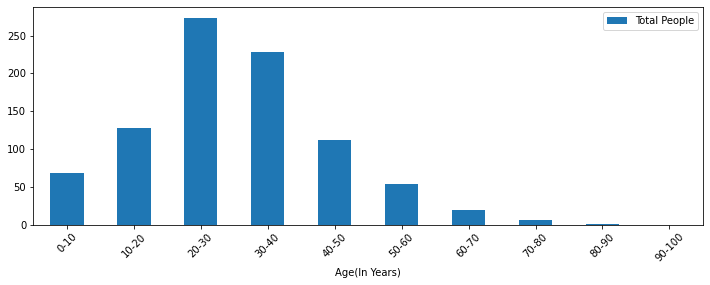

In [50]:
AgeLevel_df.plot.bar(x='Age(In Years)', y='Total People', rot=45)

<h4><b>Insight:</b></h4><p>Most passengers are ranging in 20-30 years age group

In [51]:
MALE = 0
FEMALE = 0

for x in AgeLevel['Male']:
    MALE+=x
for y in AgeLevel['Female']:
    FEMALE+=y
    
print(MALE)
print(FEMALE)

577
314


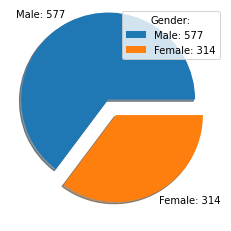

In [52]:
y = np.array([MALE, FEMALE])
mylabels = ["Male: 577", "Female: 314"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend(title = "Gender:")
plt.show() 

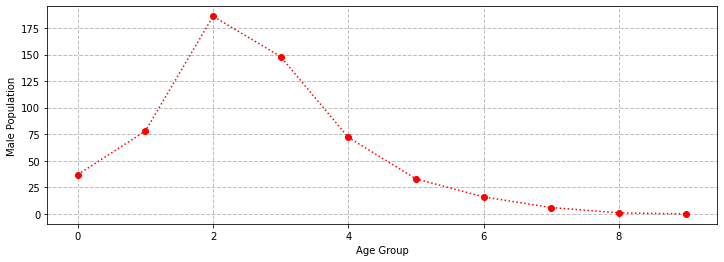

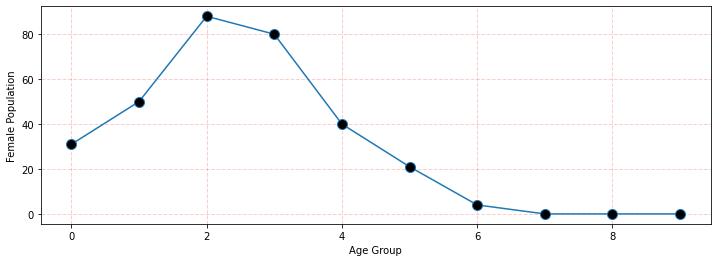

In [53]:
plt.rcParams["figure.figsize"] = [12, 4]

#Male
male = np.array([fmale[0], fmale[1], fmale[2], fmale[3], fmale[4], fmale[5], fmale[6], fmale[7], fmale[8], fmale[9]])
plt.plot(male, 'o:r')
plt.xlabel('Age Group')
plt.ylabel('Male Population')
plt.grid(alpha=0.8, linestyle='--', linewidth=1)
plt.show()

#Female
female = np.array([ffemale[0], ffemale[1], ffemale[2], ffemale[3], ffemale[4], ffemale[5], ffemale[6], ffemale[7], ffemale[8], ffemale[9]])
plt.plot(female, marker = 'o', ms = 10, mfc ='black')
plt.xlabel('Age Group')
plt.ylabel('Female Population')
plt.grid(color='red', alpha=0.2, linestyle='--', linewidth=1)
plt.show()

<h4><b>Insight:</b></h4><p>Most passengers are ranging in 20-30 years age group

In [54]:
survive = np.array(traincopy_df["Survived"])
ticketclass = np.array(traincopy_df["Pclass"])

In [55]:
#In Country wise Analysis, 2 values were missing, since 799 > 2 therefore entire study of Region data is done by ignoring those 2 values 

In [193]:
#Indepth details of Males and Females from each port
# 0-S, 1-C, 2-Q
loc = [0]*3
# Index(M,F): 0,1 for S; 2,3 for C; 4,5 for Q
loc_g = [0]*6
#Counter for population
count = 0

# 0,1,2 for Males and 3,4,5 for Females
s = [0]*6
c = [0]*6
q = [0]*6

for x in traincopy_df['Embarked']:
    if x == 'S':
        loc[0]+=1
        if traincopy_df['Sex'][count] == 'male':
            loc_g[0]+=1
            if ticketclass[count] == 1:
                s[0]+=1
            elif ticketclass[count] == 2:
                s[1]+=1
            else:
                s[2]+=1
                
        else:
            loc_g[1]+=1
            if ticketclass[count] == 1:
                s[3]+=1
            elif ticketclass[count] == 2:
                s[4]+=1
            else:
                s[5]+=1
        
    if x == 'C':
        loc[1]+=1
        if traincopy_df['Sex'][count] == 'male':
            loc_g[2]+=1
            if ticketclass[count] == 1:
                c[0]+=1
            elif ticketclass[count] == 2:
                c[1]+=1
            else:
                c[2]+=1
        else:
            loc_g[3]+=1
            if ticketclass[count] == 1:
                c[3]+=1
            elif ticketclass[count] == 2:
                c[4]+=1
            else:
                c[5]+=1
    if x == 'Q':
        loc[2]+=1
        if traincopy_df['Sex'][count] == 'male':
            loc_g[4]+=1
            if ticketclass[count] == 1:
                q[0]+=1
            elif ticketclass[count] == 2:
                q[1]+=1
            else:
                q[2]+=1
        else:
            loc_g[5]+=1
            if ticketclass[count] == 1:
                q[3]+=1
            elif ticketclass[count] == 2:
                q[4]+=1
            else:
                q[5]+=1
    count+=1

In [194]:
#Location wise Analysis

fig = go.Figure(data=[go.Pie(labels=['Southampton','Cherbourg','Queenstown'], values=[loc[0], loc[1], loc[2]])])
colors = ['#EC6B56', '#FFC154', '#47B39C']

fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=18,marker=dict(colors = colors, line=dict(color='black', width=3)))

fig.update_layout(title_text='Passengers boarded (Males and Females)')
fig.show()

In [197]:
#Using Treemap

#Southampton
Gender = ["Male", "Male", "Male", "Female", "Female", "Female"]
Classes = ["1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket", "1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket"]
Regions = ["Southampton", "Southampton", "Southampton", "Southampton", "Southampton", "Southampton"]
population = [s[0],s[1],s[2], s[3],s[4],s[5]]

#Creating a dictionary
df_s = pd.DataFrame(
                    dict(Gender=Gender, Classes=Classes, Regions=Regions, Population=population)
                 )

fig = px.treemap(df_s, path=['Regions', 'Classes', 'Gender'], values='Population')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

#Filtering out obsolete version warning
warnings.filterwarnings('ignore')
fig.show()

In [198]:
#Using Treemap

#Cherbourg
Gender = ["Male", "Male", "Male", "Female", "Female", "Female"]
Classes = ["1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket", "1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket"]
Regions = ["Cherbourg", "Cherbourg", "Cherbourg", "Cherbourg", "Cherbourg", "Cherbourg"]
population = [c[0],c[1],c[2], c[3],c[4],c[5]]

#Creating a dictionary
df_s = pd.DataFrame(
                    dict(Gender=Gender, Classes=Classes, Regions=Regions, Population=population)
                 )

fig = px.treemap(df_s, path=['Regions', 'Classes', 'Gender'], values='Population')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

#Filtering out obsolete version warning
warnings.filterwarnings('ignore')
fig.show()

In [199]:
#Using Treemap

#Queenstown
Gender = ["Male", "Male", "Male", "Female", "Female", "Female"]
Classes = ["1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket", "1st Class Ticket", "2nd Class Ticket", "3rd Class Ticket"]
Regions = ["Queenstown", "Queenstown", "Queenstown", "Queenstown", "Queenstown", "Queenstown"]
population = [q[0],q[1], q[2], q[3], q[4], q[5]]

#Creating a dictionary
df_s = pd.DataFrame(
                    dict(Gender=Gender, Classes=Classes, Regions=Regions, Population=population)
                 )

fig = px.treemap(df_s, path=['Regions', 'Classes', 'Gender'], values='Population')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

#Filtering out obsolete version warning
warnings.filterwarnings('ignore')
fig.show()

In [62]:
#Males-Females and Revenue Generation System Analysis
val = 890
i=890
fd = 0
sd = 0
td = 0

fs = 0
ss = 0
ts = 0

#Male Dead
MD = [0]*3
#Female Dead
FD = [0]*3
#Male Survived
MS = [0]*3
#Female Survived
FS = [0]*3

#Revenue Generation
RevSM = [0]*3
RevDM = [0]*3
RevSF = [0]*3
RevDF = [0]*3

while(val>-1):
    if survive[val] == 0:
            if ticketclass[val] == 1:
                fd = fd+1
                if traincopy_df['Sex'][i] == 'male':
                    MD[0]+=1
                    RevDM[0]+=traincopy_df['Fare'][i]
                else:
                    FD[0]+=1
                    RevDF[0]+=traincopy_df['Fare'][i]
            elif ticketclass[val] == 2:
                sd = sd+1
                if traincopy_df['Sex'][i] == 'male':
                    MD[1]+=1
                    RevDM[1]+=traincopy_df['Fare'][i]
                else:
                    FD[1]+=1
                    RevDF[1]+=traincopy_df['Fare'][i]
            else:
                td = td+1
                if traincopy_df['Sex'][i] == 'male':
                    MD[2]+=1
                    RevDM[2]+=traincopy_df['Fare'][i]
                else:
                    FD[2]+=1
                    RevDF[2]+=traincopy_df['Fare'][i]
    else :
            if ticketclass[val] == 1:
                fs = fs+1
                if traincopy_df['Sex'][i] == 'male':
                    MS[0]+=1
                    RevSM[0]+=traincopy_df['Fare'][i]
                else:
                    FS[0]+=1
                    RevSF[0]+=traincopy_df['Fare'][i]
            elif ticketclass[val] == 2:
                ss = ss+1
                if traincopy_df['Sex'][i] == 'male':
                    MS[1]+=1
                    RevSM[1]+=traincopy_df['Fare'][i]
                else:
                    FS[1]+=1
                    RevSF[1]+=traincopy_df['Fare'][i]
            else:
                ts = ts+1
                if traincopy_df['Sex'][i] == 'male':
                    MS[2]+=1
                    RevSM[2]+=traincopy_df['Fare'][i]
                else:
                    FS[2]+=1
                    RevSF[2]+=traincopy_df['Fare'][i]
    val = val-1 
    i-=1

survived = np.array([fd,sd,td])
dead = np.array([fs,ss,ts])

In [63]:
#Males Survival
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['1st class', '2nd class', '3rd class'], y=[MS[0], MS[1], MS[2]],
            hovertext=['41.28 %', '15.60 %', '43.12 %'])])
fig.update_layout(title_text='Males Survival')
fig.update_layout(xaxis_title='Ticket class')
fig.update_layout(yaxis_title='Population')
fig.show()

#Females Survival
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['1st class', '2nd class', '3rd class'], y=[FS[0], FS[1], FS[2]],
            hovertext=['39.05 %', '30.04 %', '30.91 %'])])
fig.update_layout(title_text='Females Survival')
fig.update_layout(xaxis_title='Ticket class')
fig.update_layout(yaxis_title='Population')
fig.show()


#Combined summary

fig = go.Figure(data=[
    go.Bar(name='Males', x=['1st class', '2nd class', '3rd class'], y=[MS[0], MS[1], MS[2]]),
    go.Bar(name='Females', x=['1st class', '2nd class', '3rd class'], y=[FS[0], FS[1], FS[2]])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Survival (Males VS Females)')
fig.update_layout(xaxis_title='Ticket class')
fig.update_layout(yaxis_title='Population')
fig.show()

In [64]:
#Males Death

fig = go.Figure(data=[go.Pie(labels=['1st class','2nd class','3rd class'], values=[MD[0], MD[1], MD[2]])])
colors = [' #EC6B56', '#FFC154', '#47B39C']

fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=18,marker=dict(colors = colors, line=dict(color='black', width=3)))

fig.update_layout(title_text='Males Death')
fig.show()


#Females Death

fig = go.Figure(data=[go.Pie(labels=['1st class','2nd class','3rd class'], values=[FD[0], FD[1], FD[2]])])
colors = ['#FD6787', '#FFF44C', '#288EEB']

fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=18,marker=dict(colors = colors, line=dict(color='black', width=3)))

fig.update_layout(title_text='Females Death')
fig.show()


#Combined Summary
fig = go.Figure(data=[
    go.Bar(name='Males', x=['1st class', '2nd class', '3rd class'], y=[MD[0], MD[1], MD[2]]),
    go.Bar(name='Females', x=['1st class', '2nd class', '3rd class'], y=[FD[0], FD[1], FD[2]])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Death (Males VS Females)')
fig.update_layout(xaxis_title='Ticket class')
fig.update_layout(yaxis_title='Population')
fig.show()

Text(0, 0.5, 'Population')

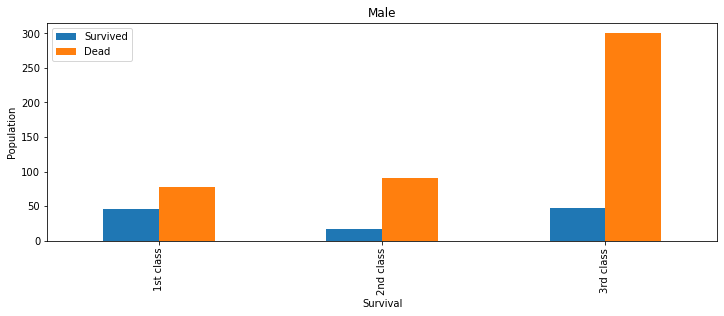

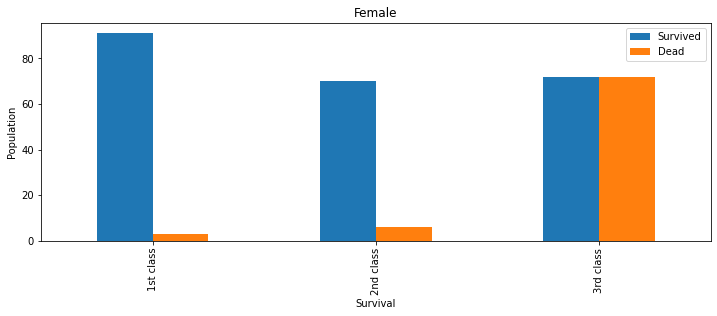

In [65]:
#MALE
pdata = pd.DataFrame(
    {
     "Survived": [MS[0], MS[1], MS[2]], 
     "Dead":[MD[0], MD[1], MD[2]]
    },
    index=["1st class", "2nd class", "3rd class"])

pdata.plot(kind="bar")

plt.title("Male")
plt.xlabel("Survival")
plt.ylabel("Population")


#FEMALE

pdata = pd.DataFrame(
    {
     "Survived": [FS[0], FS[1], FS[2]], 
     "Dead":[FD[0], FD[1], FD[2]]
    },
    index=["1st class", "2nd class", "3rd class"])

pdata.plot(kind="bar")

plt.title("Female")
plt.xlabel("Survival")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

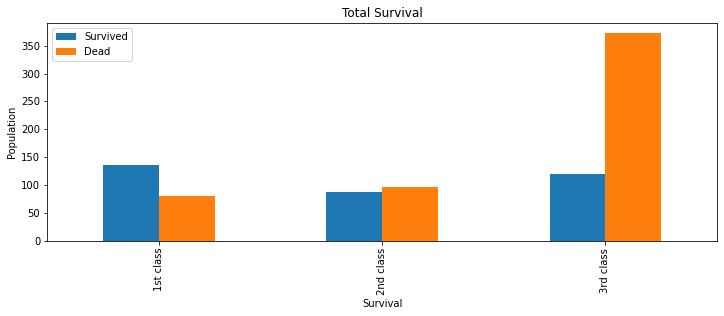

In [66]:
pdata = pd.DataFrame(
    {
     "Survived": [fs, ss, ts], 
     "Dead":[fd, sd, td]
    },
    index=["1st class", "2nd class", "3rd class"])

pdata.plot(kind="bar")

plt.title("Total Survival")
plt.xlabel("Survival")
plt.ylabel("Population")

<h4><b>Reason:</b><p>
        <p>I created 2 Arrays, Survive and TicketClass.
        <p>Using a loop, I calculated Survival Rate of People according to the ticket that they bought.
        <p>Through the data I came to know: 
        <p>That People having 3rd Class Ticket died most followed by 2nd class and 3rd class. 
</h4>
<h4><b>Conclusion:</b><p>
        <p>Through this comparison I come to the conclusion that least safety measures were made for the 3rd class cabins, clearly showing lack of Security               on the basis of Class Discrimination.
</h4>

In [67]:
#Revenue Model

In [68]:
#Total Revenue
fig = go.Figure(data=[go.Pie(labels=['Males','Females'], text=['$','$'], values=[sum(RevSM)+sum(RevDM), sum(RevSF)+sum(RevDF)])])

fig.update_traces(hoverinfo='label+percent', textinfo='label+text+value',textfont_size=18,marker=dict(colors = colors, line=dict(color='black', width=3)))

fig.update_layout(title_text='Total Revenue($)')
fig.show()





In [69]:
#Revenue From Male
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Male'],
    x=[sum(RevSM)],
    name='Survived Male',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=['Male'],
    x=[sum(RevDM)],
    name='Dead Male',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Revenue from Male($)')
fig.update_layout(xaxis_title='Revenue($)')
fig.update_layout(yaxis_title='Gender')
fig.show()

#Revenue From Female
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Female'],
    x=[sum(RevSF)],
    name='Survived Female',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=['Female'],
    x=[sum(RevDF)],
    name='Dead Female',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Revenue from Female($)')
fig.update_layout(xaxis_title='Revenue($)')
fig.update_layout(yaxis_title='Gender')
fig.show()

In [75]:
#Combined Summary of Survived+Dead Male and Female Revenue according to class
fig = go.Figure(data=[
    go.Bar(name='Males Survived', x=['1st class', '2nd class', '3rd class'], y=[RevSM[0], RevSM[1], RevSM[2]]),
    go.Bar(name='Females Survived', x=['1st class', '2nd class', '3rd class'], y=[RevSF[0], RevSF[1], RevSF[2]]),
    go.Bar(name='Males Dead', x=['1st class', '2nd class', '3rd class'], y=[RevDM[0], RevDM[1], RevDM[2]]),
    go.Bar(name='Females Dead', x=['1st class', '2nd class', '3rd class'], y=[RevDF[0], RevDF[1], RevDF[2]])
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Revenue ($)',xaxis_title='Ticket Type',yaxis_title='Revenue($)')
fig.show()

In [71]:
#Path of Titanic before getting sunk

In [72]:
path = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(50.909698, -1.40435), zoom=7, scroll_wheel_zoom = True)

ant_path = AntPath( name ='Route' ,    locations=[ [50.909698, -1.404351],
                                                   [49.630001, -1.620000],
                                                   [51.850334, -8.294286],
                                                   [41.7667, -50.2333]],
                                                                                dash_array=[1, 100],
                                                                                delay=1000,
                                                                                color='blue',
                                                                                pulse_color='black')

path.add_layer(ant_path)


#Location of all three destinations

S = [50.909698, -1.404351]
C = [49.630001, -1.620000]
Q = [51.850334, -8.294286]
Sank = [41.7667, -50.2333]

#Code for marker that will point on those location
marker1 = Marker(name='Southampton' ,icon=AwesomeIcon(name='home',marker_color='black',icon_color='white',spin=False), draggable = False, location=S)
marker2 = Marker(name='Cherbourg' ,icon=AwesomeIcon(name='home',marker_color='black',icon_color='white',spin=False), draggable = False, location=C)
marker3 = Marker(name='Queenstown' ,icon=AwesomeIcon(name='home',marker_color='black',icon_color='white',spin=False), draggable = False, location=Q)
#Sank site
marker4 = Marker(name='Sank' ,icon=AwesomeIcon(name='ship',marker_color='black',icon_color='white',spin=False), draggable = False, location=Sank)
path.add_layer(marker1)
path.add_layer(marker2)
path.add_layer(marker3)
path.add_layer(marker4)

#Layers enable - disable option
control = LayersControl(position='topright')
path.add_layer(control)

#Full screen option
path.add_control(FullScreenControl())


#Highlighting the ports

#Load GeoJson data created through geojson.io website
with open('/Users/vipulpayal/Desktop/Day/#D-1-21.11.2022/map.geojson') as locations:
    loc = json.load(locations)

loc_layer = GeoJSON(
                        data = loc, name = 'Departure Area',
                        style = {
                                    'color': 'orange',
                                    'opacity': 1.0,
                                    'weight': 2,
                                    'fill': 'yellow',
                                    'fillopacity': 5,
                                },
                        hover_style = {
                                        'color': 'black', 'fillOpacity': 0.5, 
                                      },
                        #Creating a lambda function as style_callback needs to get a value from a function
                        style_callback =  lambda feature: {'fillColor': 'red'}
                    )


#Adding Json layer
path.add_layer(loc_layer)

path

Map(center=[50.909698, -1.40435], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …